# Homework Starter — Stage 10a: Linear Regression

Use this as a scaffold if your project data isn’t ready. Replace the synthetic data section with your dataset when possible. (Used my own data)

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import scipy.stats as st

sns.set()
np.random.seed(7)

In [ ]:
# load your cleaned returns data
df = pd.read_parquet("/Users/paramshah/Desktop/bootcamp/project/data/returns_proc.parquet")  # adjust path if needed
df.head()

,SOXX,ADI,AMD,ASML,AVGO,INTC,MU,QCOM,TSM,TXN
Date,,,,,,,,,,
2010-01-05,-0.001605,-0.001578,0.001031,0.007790,0.007423,-0.000478,0.029493,0.024073,-0.004317,-0.005767
2010-01-06,-0.003015,-0.001897,-0.014418,0.009161,0.007895,-0.003355,0.004476,-0.009777,-0.003469,-0.007347
2010-01-07,-0.007863,-0.007922,-0.010449,-0.027801,-0.006266,-0.009615,-0.033868,0.028991,-0.033072,0.003116
2010-01-08,0.015037,0.005749,-0.004224,-0.023928,0.007357,0.011165,0.023985,0.010004,-0.000900,0.022912
2010-01-11,-0.003003,-0.005716,-0.030753,-0.021226,0.006260,0.005761,-0.018018,-0.003639,-0.005405,-0.012908


## 1) Synthetic data (replace with your project data when ready)
- Finance-flavored factors and asset excess return
- Includes a quadratic effect to motivate specification checks

In [10]:
# Predict SOXX from its main constituents
X = df[['AVGO','TSM','AMD','INTC','QCOM','TXN','ASML','MU','ADI']]
y = df['SOXX']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=69
)

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 2) Baseline model fit
Follow the steps; replace `df` with your project DataFrame when ready.

In [11]:
# Generate predictions
y_pred = model.predict(X_test)

In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 0.0029690147037930927
Mean Squared Error (MSE): 1.5131114203981603e-05
R-squared (R²): 0.9544913920426251


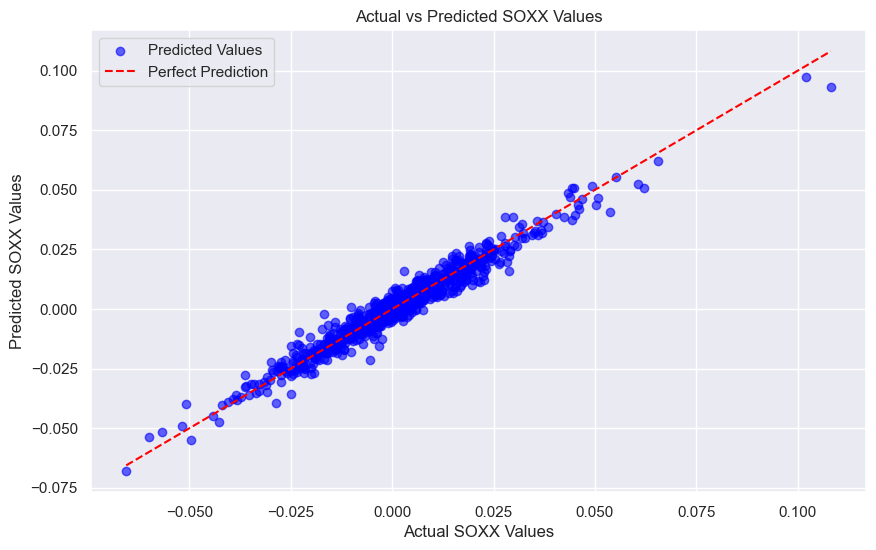

In [16]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Values', alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted SOXX Values')
plt.xlabel('Actual SOXX Values')
plt.ylabel('Predicted SOXX Values')
plt.legend()
plt.grid(True)
plt.show()

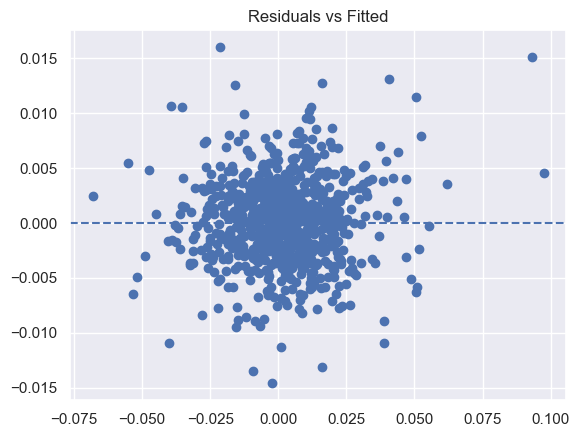

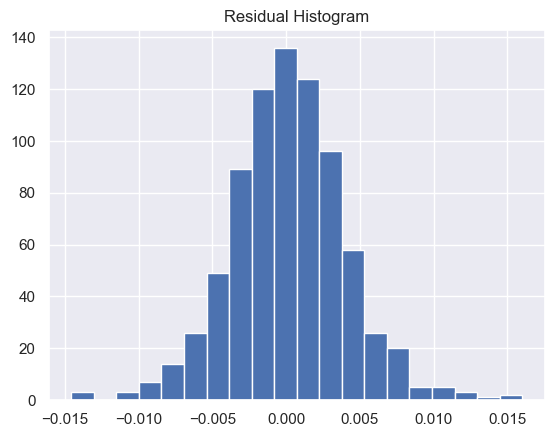

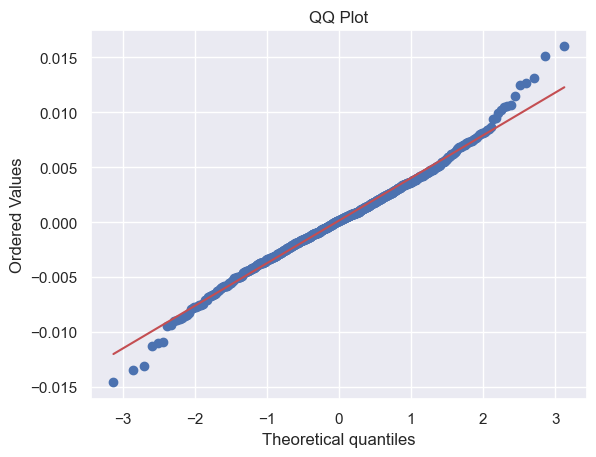

In [13]:
resid = y_test - y_pred
fitted = y_pred
plt.figure(); plt.scatter(fitted, resid); plt.axhline(0, ls='--'); plt.title('Residuals vs Fitted'); plt.show()
plt.figure(); plt.hist(resid, bins=20); plt.title('Residual Histogram'); plt.show()
plt.figure(); st.probplot(resid, dist='norm', plot=plt); plt.title('QQ Plot'); plt.show()

## 3) Optional: Add a transformed feature
Add a polynomial or interaction if diagnostics suggest mis-specification.

In [14]:
# df['momentum_sq'] = df['momentum']**2
# X2 = df[['mkt_excess','size','value','momentum','momentum_sq']]
# X2_train, X2_test = X2.iloc[:len(X_train)], X2.iloc[len(X_train):]
# lr2 = LinearRegression().fit(X2_train, y_train)
# y_pred2 = lr2.predict(X2_test)
# r2_2 = r2_score(y_test, y_pred2)
# rmse_2 = mean_squared_error(y_test, y_pred2, squared=False)
# print(f'With x^2   R²={r2_2:.4f}  RMSE={rmse_2:.6f}')

## 4) Interpretation (write your conclusions below)
- Linearity: the scatterplot looks like it can be judged from a linear plot
- Homoscedasticity: there is no visible heteroscedasticity
- Normality: the residual data looks pretty normal, depending on the Q-Q plot and the residual histogram
- Independence: observations are independent of each other as they are different seperate scrips depending totally on the company's performance
- Which model do you trust and why?: Linear regression seems straightforward, simple and effective in this case
- Next step you’d try: Maybe change the returns data to something else, and engineer the features and do a time series autoregression of some sort for better clarity